# Bank Marketing Data Classification

## Problem Description
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

# Importing Necessary Libraries

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Getting the Data

In [3]:
# Get the Data
data = pd.read_csv("bank-full.csv", sep=";")
print(data.columns)
print(len(data))
print(data['y'])

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
45211
0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object


In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [8]:
# Describing the basic stats of the data
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [10]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## There are no missing values in the dataset

In [11]:
data['age'].nunique()

77

In [12]:
data['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [13]:
data['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [14]:
print("Total categories in the feature loan:\n", data['loan'].value_counts(), "\n")

Total categories in the feature loan:
 no     37967
yes     7244
Name: loan, dtype: int64 



In [15]:
print("Max and Min value in the feature duration")
data['duration'].min(), data['duration'].max()

Max and Min value in the feature duration


(0, 4918)

In [16]:
print("Total categories in the feature default")
data['default'].value_counts()

Total categories in the feature default


no     44396
yes      815
Name: default, dtype: int64

In [17]:
print("Total categories in the feature education")
data['education'].value_counts()

Total categories in the feature education


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [18]:
print("Total categories in the feature marital")
data['marital'].value_counts()

Total categories in the feature marital


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [19]:
print("Total categories in the feature job")
data['job'].value_counts()

Total categories in the feature job


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [20]:
print("Total categories in the feature housing")
data['housing'].value_counts()

Total categories in the feature housing


yes    25130
no     20081
Name: housing, dtype: int64

In [21]:
print("Total categories in the feature contact")
data['contact'].value_counts()

Total categories in the feature contact


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [22]:
data['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

In [23]:
# Finding the correlation in the data
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00



# We see there are no significant correlation between the numerical features 

# Exploratory Data Analysis

<AxesSubplot:xlabel='age', ylabel='count'>

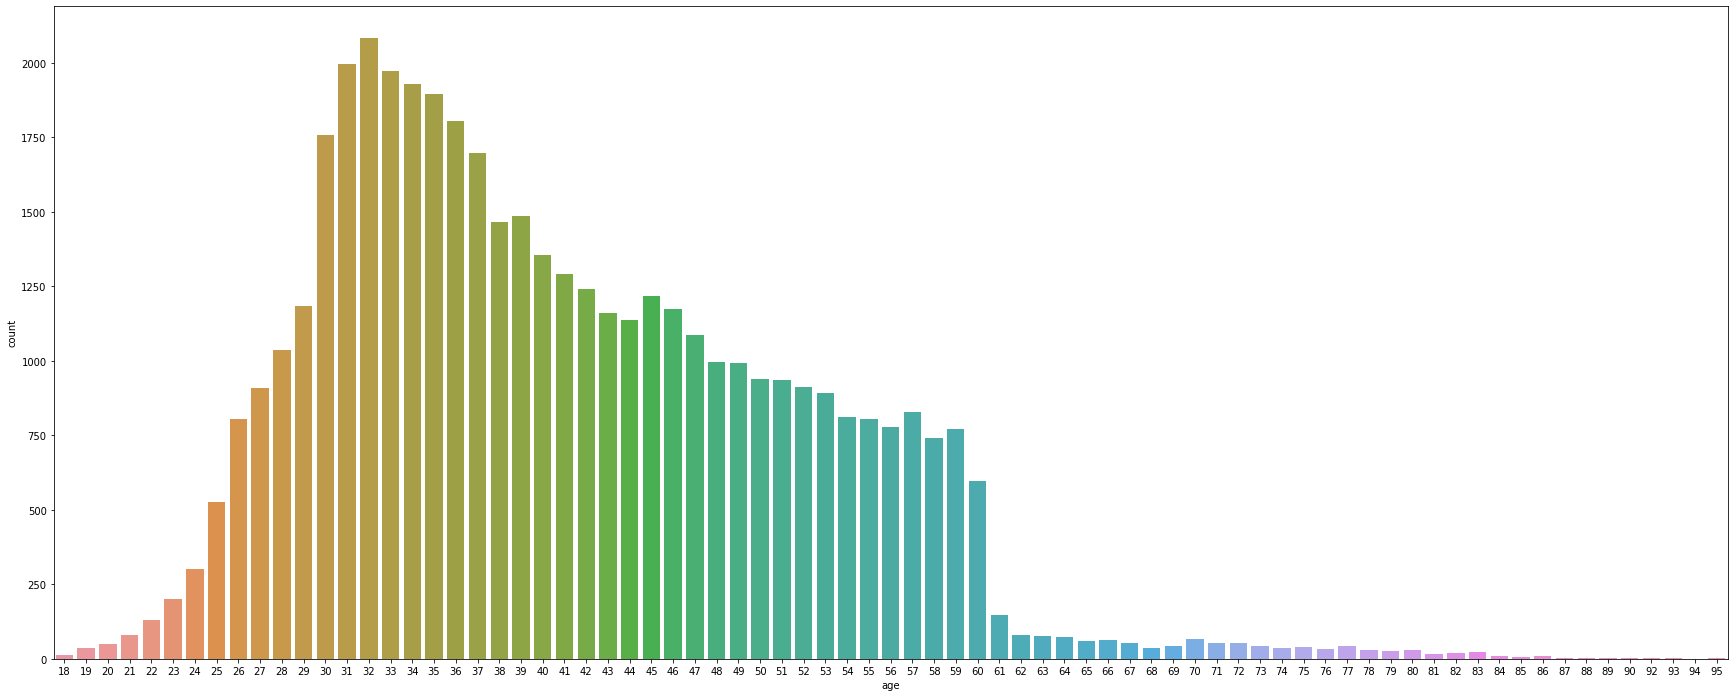

In [24]:
plt.figure(figsize=(30,12))
sns.countplot(x=data['age'], data=data)

## Inference: The count of people is gradually increasing from age 30 and peaking at 32. This shows that bank's campaigns are created with a target audience of age 30-38. We also see that these campaigns target people right from age 18-19, all the way to their 60's

<AxesSubplot:xlabel='age', ylabel='Count'>

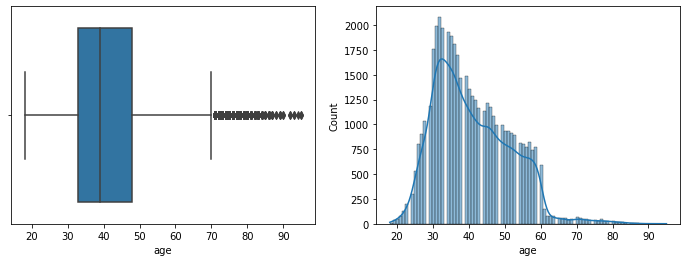

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='age', data=data, ax=axes[0])
sns.histplot(x='age', data=data, kde=True, ax=axes[1])


<AxesSubplot:xlabel='day', ylabel='count'>

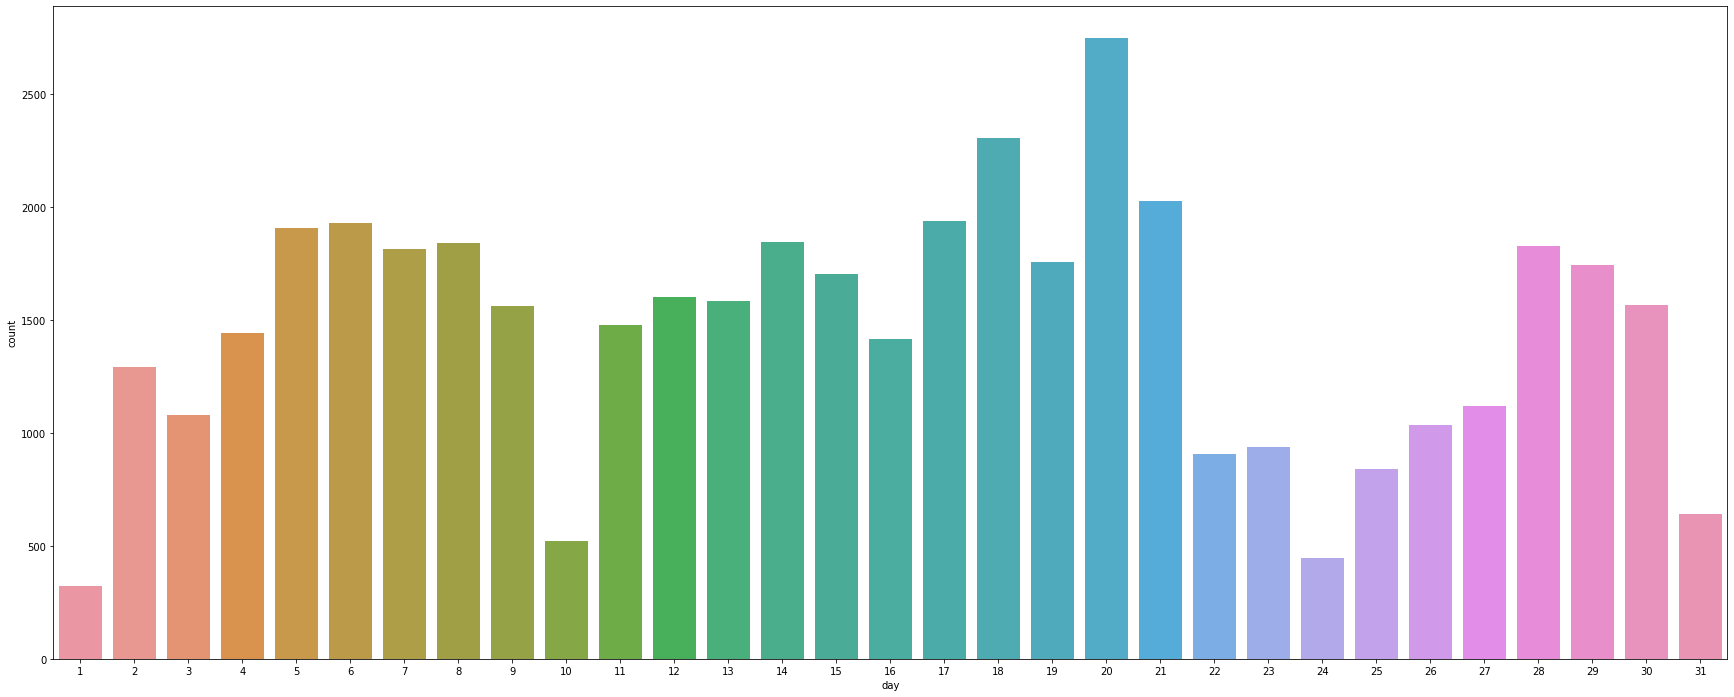

In [26]:
plt.figure(figsize=(30,12))
sns.countplot(x=data['day'], data=data)

## Inference: Call volume is largely associated by the mid of the month. This might be associated with the sentiments of the buyer.

<AxesSubplot:xlabel='day', ylabel='Count'>

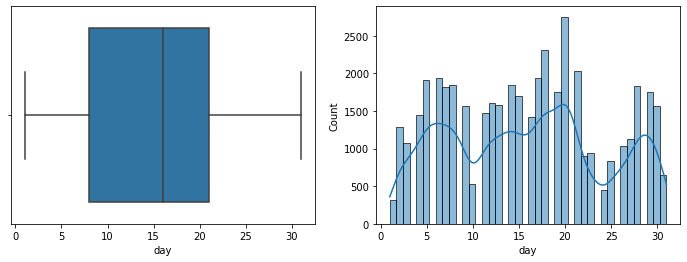

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='day', data=data, ax=axes[0])
sns.histplot(x='day', data=data, kde=True, ax=axes[1])

<AxesSubplot:xlabel='campaign', ylabel='count'>

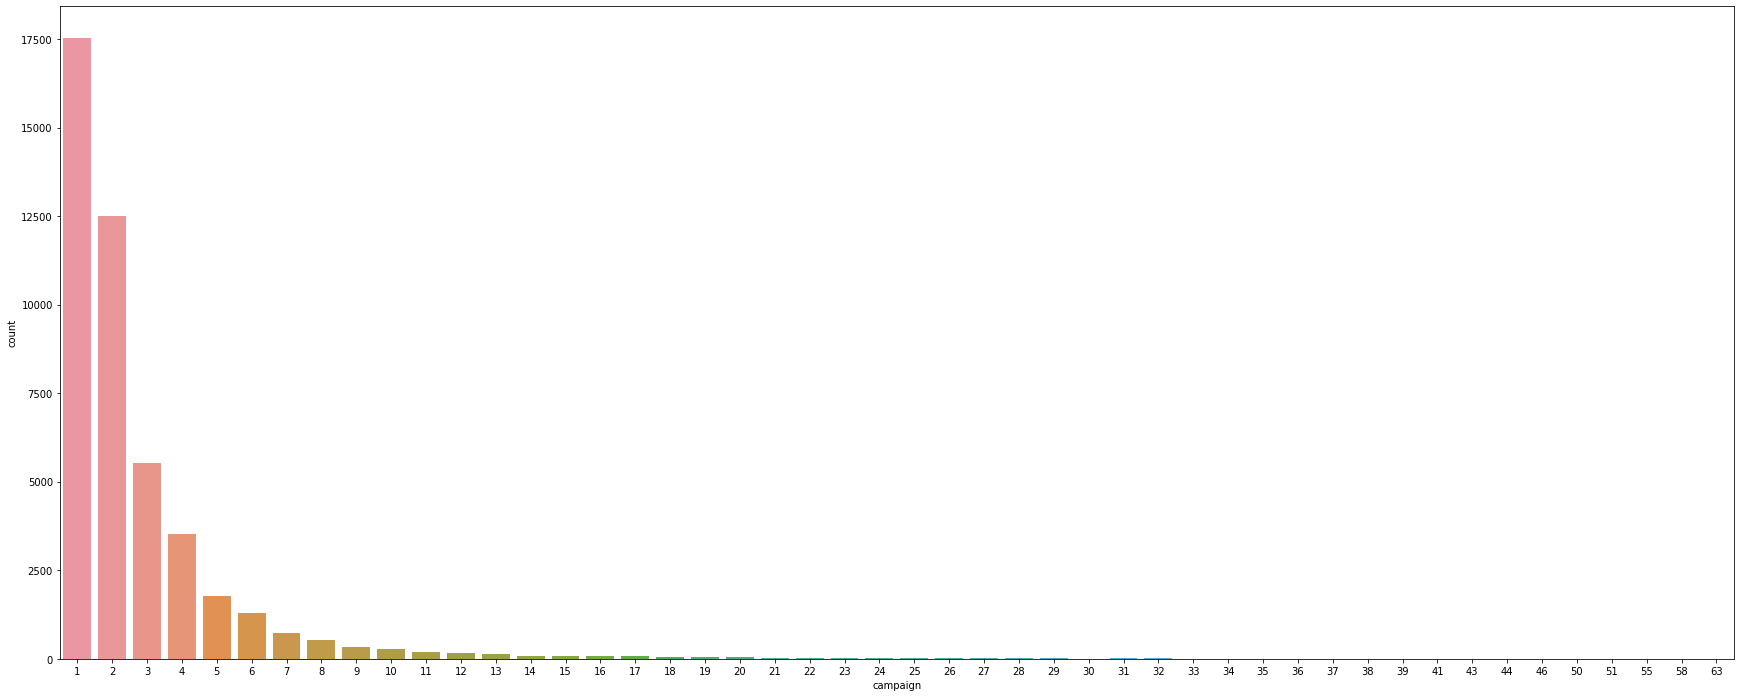

In [28]:
plt.figure(figsize=(30,12))
sns.countplot(x=data['campaign'], data=data)

## Inference:  Most of the customers that were targeted belonged to the first campaign. This shows the haste of the bank to promote their campaigns in the first propaganda itself

<AxesSubplot:xlabel='campaign', ylabel='Count'>

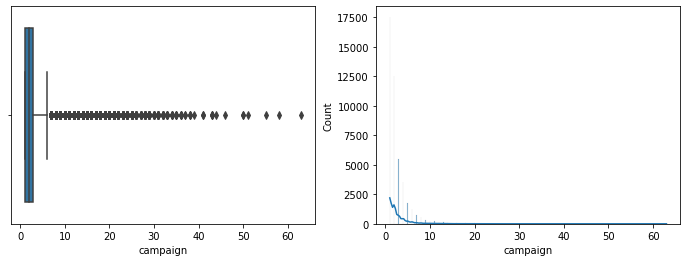

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='campaign', data=data, ax=axes[0])
sns.histplot(x='campaign', data=data, kde=True, ax=axes[1])

## Inference: There  are good number of outliers. It is better to consider the instances where the customers are targetted in the first few propagandas of the campaigns

<AxesSubplot:xlabel='duration', ylabel='Count'>

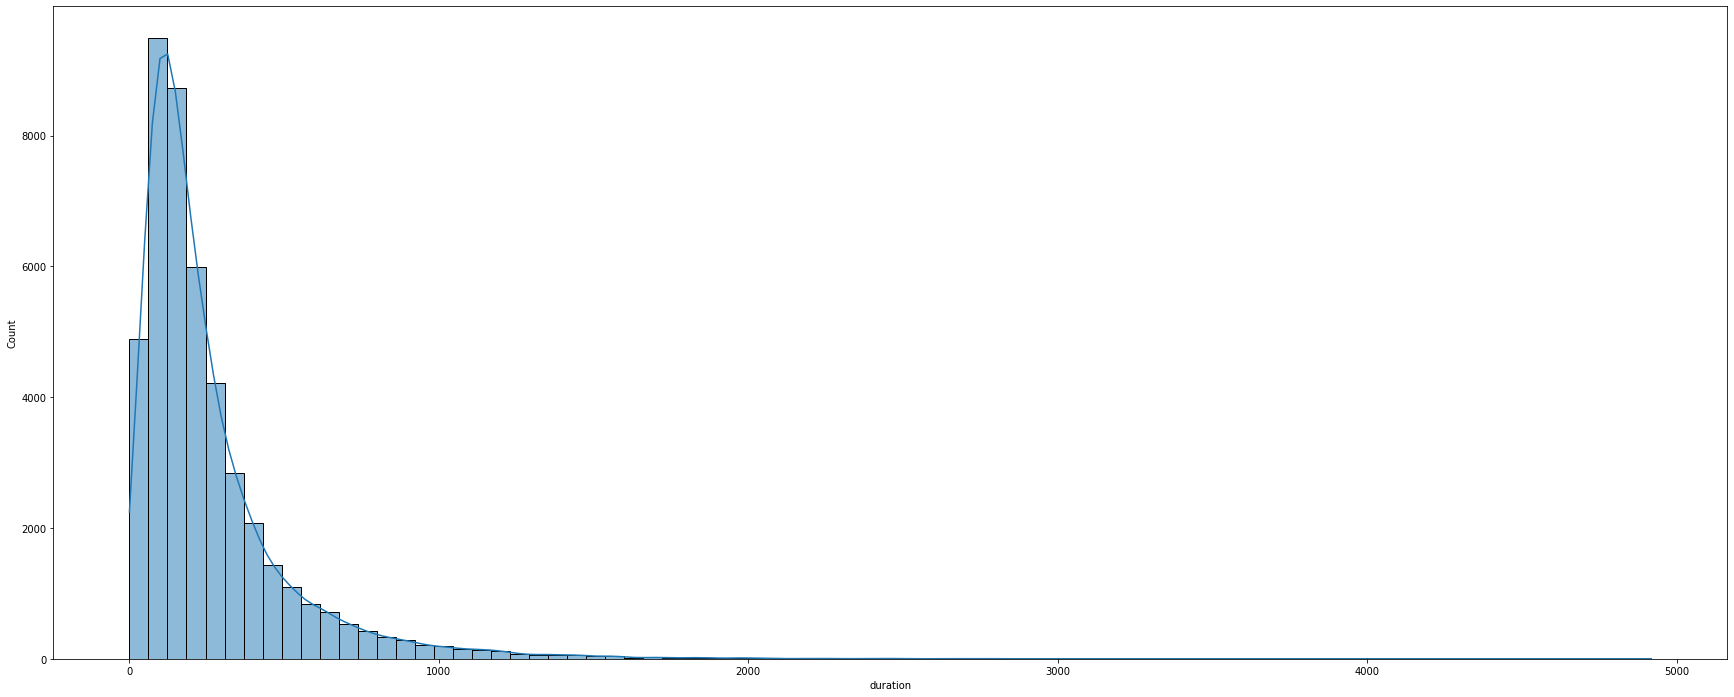

In [30]:
plt.figure(figsize=(30,12))
sns.histplot(x=data['duration'], data=data, bins=80, legend=True, kde=True)

## Inference: Calling duration is mostly between 61 and 123 seconds, which is roughly 2 minutes

<AxesSubplot:xlabel='duration', ylabel='Count'>

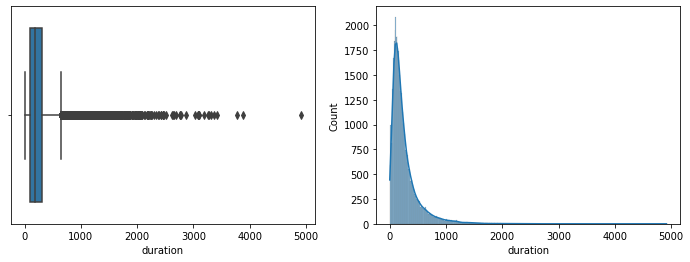

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='duration', data=data, ax=axes[0])
sns.histplot(x='duration', data=data, kde=True, ax=axes[1])

## Inference: There are lot of outliers around this feature

<AxesSubplot:xlabel='previous', ylabel='Count'>

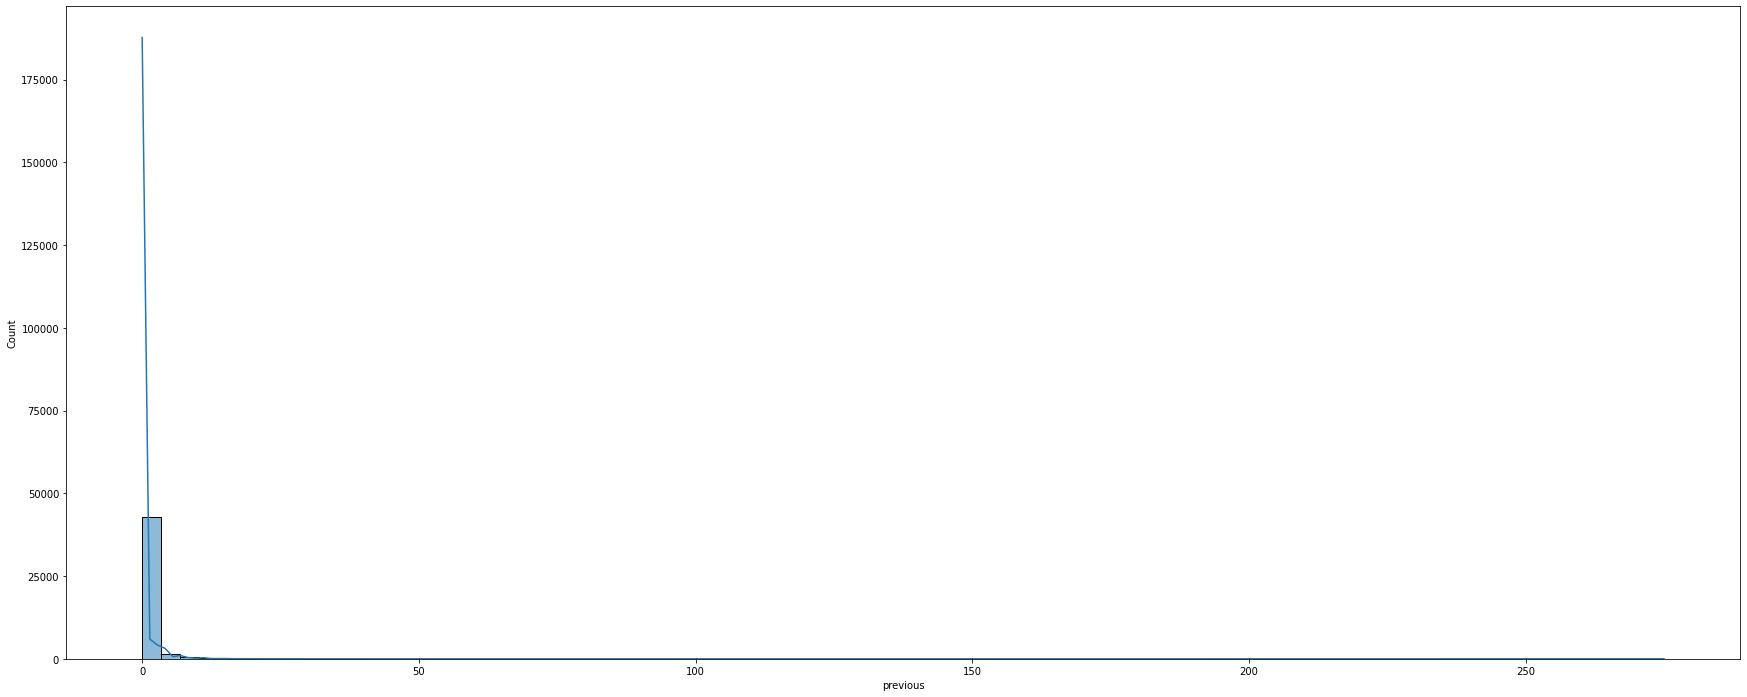

In [32]:
plt.figure(figsize=(30,12))
sns.histplot(x=data['previous'], data=data, bins=80, legend=True, kde=True)

<AxesSubplot:xlabel='previous', ylabel='Count'>

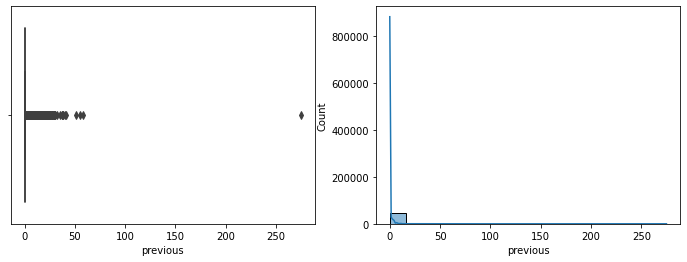

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='previous', data=data, ax=axes[0])
sns.histplot(x='previous', data=data, kde=True, ax=axes[1])

## It seems that most of the calls to clients were unique. There are hardly any repeat calls

## Finding out how many calls of duration 1-2 minutes resulted in a successful conversion of the client

In [34]:
data_calls_1_2 = data[(data['duration'] >= 60) & (data['duration'] <= 120)]

<AxesSubplot:title={'center':'Conversion Distribution For Call Duration of 1-2 minutes'}>

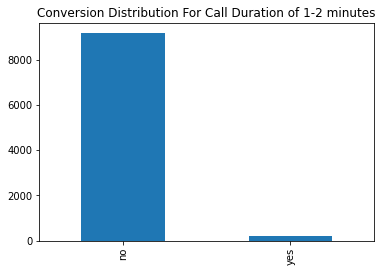

In [35]:
data_calls_1_2['y'].value_counts().plot(kind="bar", title="Conversion Distribution For Call Duration of 1-2 minutes")

## Finding out how many calls of duration greater than 10 minutes resulted in a successful conversion of the client

In [36]:
data_calls_10 = data[(data['duration'] >= 600)]

In [37]:
data_calls_10

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,no
44,58,retired,married,unknown,no,96,yes,no,unknown,5,may,616,1,-1,0,unknown,no
53,42,admin.,single,secondary,no,-76,yes,no,unknown,5,may,787,1,-1,0,unknown,no
59,46,services,married,primary,no,179,yes,no,unknown,5,may,1778,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45158,34,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


<AxesSubplot:title={'center':'Conversion Distribution For Call Duration Greater Than 10 Minutes'}>

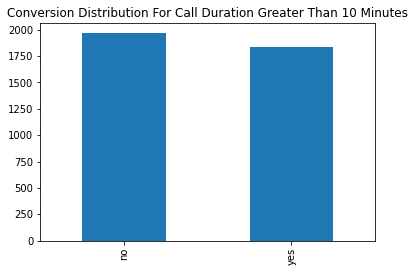

In [38]:
data_calls_10['y'].value_counts().plot(kind="bar", title="Conversion Distribution For Call Duration Greater Than 10 Minutes")

## Inference: Longer calls resulted in better conversion rate which indeed makes sense

## Finding out how the day of the month might affect conversion numbers

<AxesSubplot:xlabel='day', ylabel='count'>

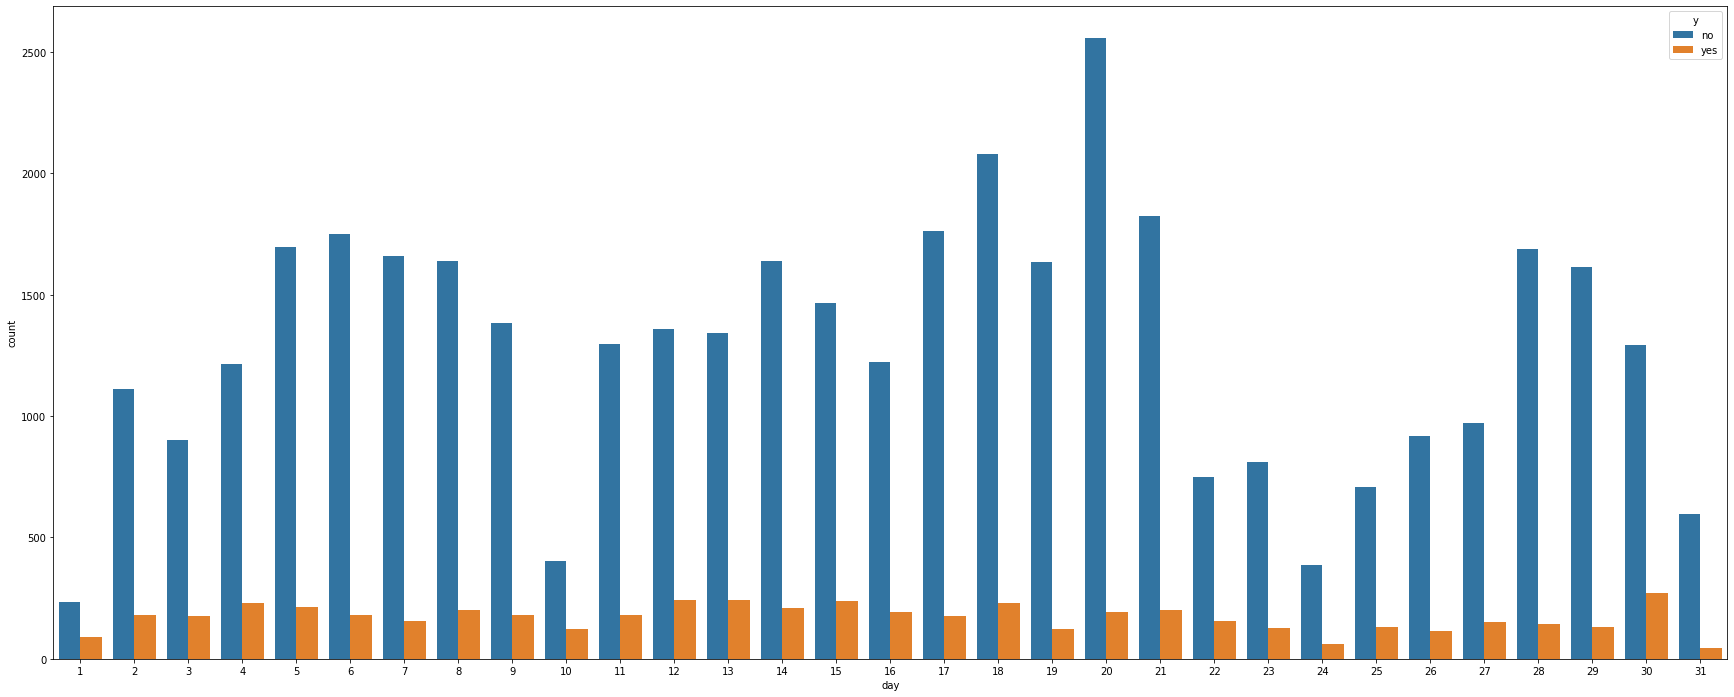

In [39]:
plt.figure(figsize=(30,12))
sns.countplot(x=data['day'], hue = data['y'],data=data)

### Inference: Although the number of calls made during the mid month are a lot, the conversion numbers doesn't seem to vary with the day the call was made

<AxesSubplot:xlabel='marital', ylabel='count'>

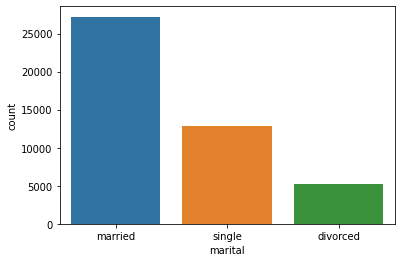

In [40]:
# Finding out the distribution of marital status
sns.countplot(x=data['marital'], data=data)

### Inference: Most of the targetted customers are married, this is a corollary of the fact that most targetted customers are aged 32 onwards

### Seeing if marital status affects the decision of the consumer to opt in or out

<AxesSubplot:xlabel='marital', ylabel='count'>

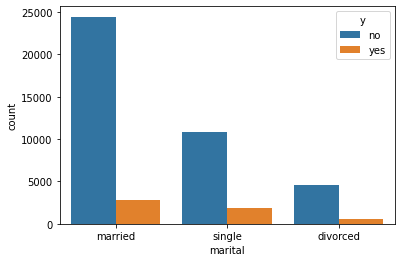

In [41]:
sns.countplot(x=data['marital'], hue = data['y'],data=data)

In [42]:
data.groupby(by=['marital']).count()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
marital,,,,,,,,,,,,,,,,
divorced,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207
married,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214
single,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790


In [43]:
data.groupby(by=['marital', 'y']).count()

age    job  education  default  balance  housing   loan  \
marital  y                                                                
divorced no    4585   4585       4585     4585     4585     4585   4585   
         yes    622    622        622      622      622      622    622   
married  no   24459  24459      24459    24459    24459    24459  24459   
         yes   2755   2755       2755     2755     2755     2755   2755   
single   no   10878  10878      10878    10878    10878    10878  10878   
         yes   1912   1912       1912     1912     1912     1912   1912   

              contact    day  month  duration  campaign  pdays  previous  \
marital  y                                                                 
divorced no      4585   4585   4585      4585      4585   4585      4585   
         yes      622    622    622       622       622    622       622   
married  no     24459  24459  24459     24459     24459  24459     24459   
         yes     2755   2755   2755      2755      2755   2755      2755   
single   no     10878  10878  10878     10878     10878  10878     10878   
         yes     1912   1912   1912      1912      1912   1912      1912   

              poutcome  
marital  y              
divorced no       4585  
         yes       622  
married  no      24459  
         yes      2755  
single   no      10878  
         yes      1912

In [44]:
print("Conversion rate for customers who are divorced", 622/5207 * 100, "percent")
print("Conversion rate for customers who are married", 2755/27214 * 100, "percent")
print("Conversion rate for customers who are single", 1912/12790 * 100, "percent")

Conversion rate for customers who are divorced 11.945458037257538 percent
Conversion rate for customers who are married 10.123465863158668 percent
Conversion rate for customers who are single 14.94917904612979 percent


### Inference: The conversion rate for customers who are single have better conversion rate of ~15%

### Seeing if education affects the decision of the consumer to opt in or out

<AxesSubplot:xlabel='education', ylabel='count'>

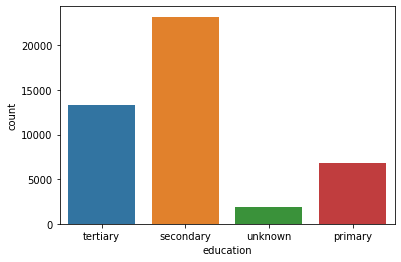

In [45]:
# Distribution for education
sns.countplot(x=data['education'], data=data)

<AxesSubplot:xlabel='education', ylabel='count'>

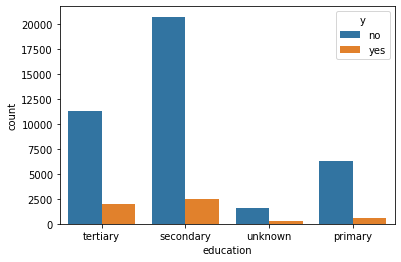

In [46]:
sns.countplot(x=data['education'], hue = data['y'],data=data)

In [47]:
data.groupby(by=['education']).count()

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
education,,,,,,,,,,,,,,,,
primary,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851
secondary,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202
tertiary,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301
unknown,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857


In [48]:
data.groupby(by=['education', 'y']).count()

age    job  marital  default  balance  housing   loan  \
education y                                                              
primary   no    6260   6260     6260     6260     6260     6260   6260   
          yes    591    591      591      591      591      591    591   
secondary no   20752  20752    20752    20752    20752    20752  20752   
          yes   2450   2450     2450     2450     2450     2450   2450   
tertiary  no   11305  11305    11305    11305    11305    11305  11305   
          yes   1996   1996     1996     1996     1996     1996   1996   
unknown   no    1605   1605     1605     1605     1605     1605   1605   
          yes    252    252      252      252      252      252    252   

               contact    day  month  duration  campaign  pdays  previous  \
education y                                                                 
primary   no      6260   6260   6260      6260      6260   6260      6260   
          yes      591    591    591       591       591    591       591   
secondary no     20752  20752  20752     20752     20752  20752     20752   
          yes     2450   2450   2450      2450      2450   2450      2450   
tertiary  no     11305  11305  11305     11305     11305  11305     11305   
          yes     1996   1996   1996      1996      1996   1996      1996   
unknown   no      1605   1605   1605      1605      1605   1605      1605   
          yes      252    252    252       252       252    252       252   

               poutcome  
education y              
primary   no       6260  
          yes       591  
secondary no      20752  
          yes      2450  
tertiary  no      11305  
          yes      1996  
unknown   no       1605  
          yes       252

In [49]:
print("Conversion rate for customers who have primary education", 591/6851 * 100, "percent")
print("Conversion rate for customers who have secondary education", 2450/23202 * 100, "percent")
print("Conversion rate for customers who have tertiary education", 1996/13301 * 100, "percent")
print("Conversion rate for customers whose education is unknown", 252/1857 * 100, "percent")

Conversion rate for customers who have primary education 8.626477886439936 percent
Conversion rate for customers who have secondary education 10.559434531505904 percent
Conversion rate for customers who have tertiary education 15.006390496955117 percent
Conversion rate for customers whose education is unknown 13.5702746365105 percent


### Inference: It is clearly seen that the customers holding a tertiary education has the best conversion rate of 15%

### Seeing if loan entitlement affects the decision of the consumer to opt in or out

<AxesSubplot:xlabel='loan', ylabel='count'>

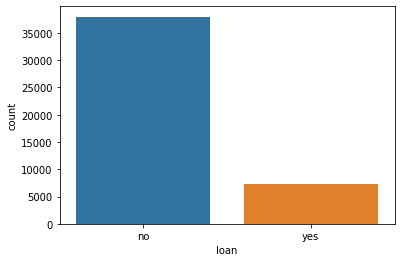

In [50]:
# Distribution of loan
sns.countplot(x=data['loan'], data=data)

<AxesSubplot:xlabel='loan', ylabel='count'>

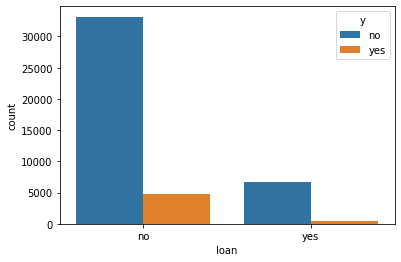

In [51]:
sns.countplot(x=data['loan'], hue = data['y'],data=data)

In [52]:
data.groupby(by=['loan']).count()

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
loan,,,,,,,,,,,,,,,,
no,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967
yes,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244


In [53]:
data.groupby(by=['loan', 'y']).count()

age    job  marital  education  default  balance  housing  \
loan y                                                                  
no   no   33162  33162    33162      33162    33162    33162    33162   
     yes   4805   4805     4805       4805     4805     4805     4805   
yes  no    6760   6760     6760       6760     6760     6760     6760   
     yes    484    484      484        484      484      484      484   

          contact    day  month  duration  campaign  pdays  previous  poutcome  
loan y                                                                          
no   no     33162  33162  33162     33162     33162  33162     33162     33162  
     yes     4805   4805   4805      4805      4805   4805      4805      4805  
yes  no      6760   6760   6760      6760      6760   6760      6760      6760  
     yes      484    484    484       484       484    484       484       484

In [54]:
print("Conversion rate for customers who have a loan", 484/7244 * 100, "percent")
print("Conversion rate for customers who does not have a loan", 4805/37967 * 100, "percent")

Conversion rate for customers who have a loan 6.681391496410822 percent
Conversion rate for customers who does not have a loan 12.655727342165566 percent


### Inference: It is clearly seen that the customers not having a loan on them has better conversion rate of 12%


### Seeing if job type of the customers has any affect on the 

<AxesSubplot:xlabel='job', ylabel='count'>

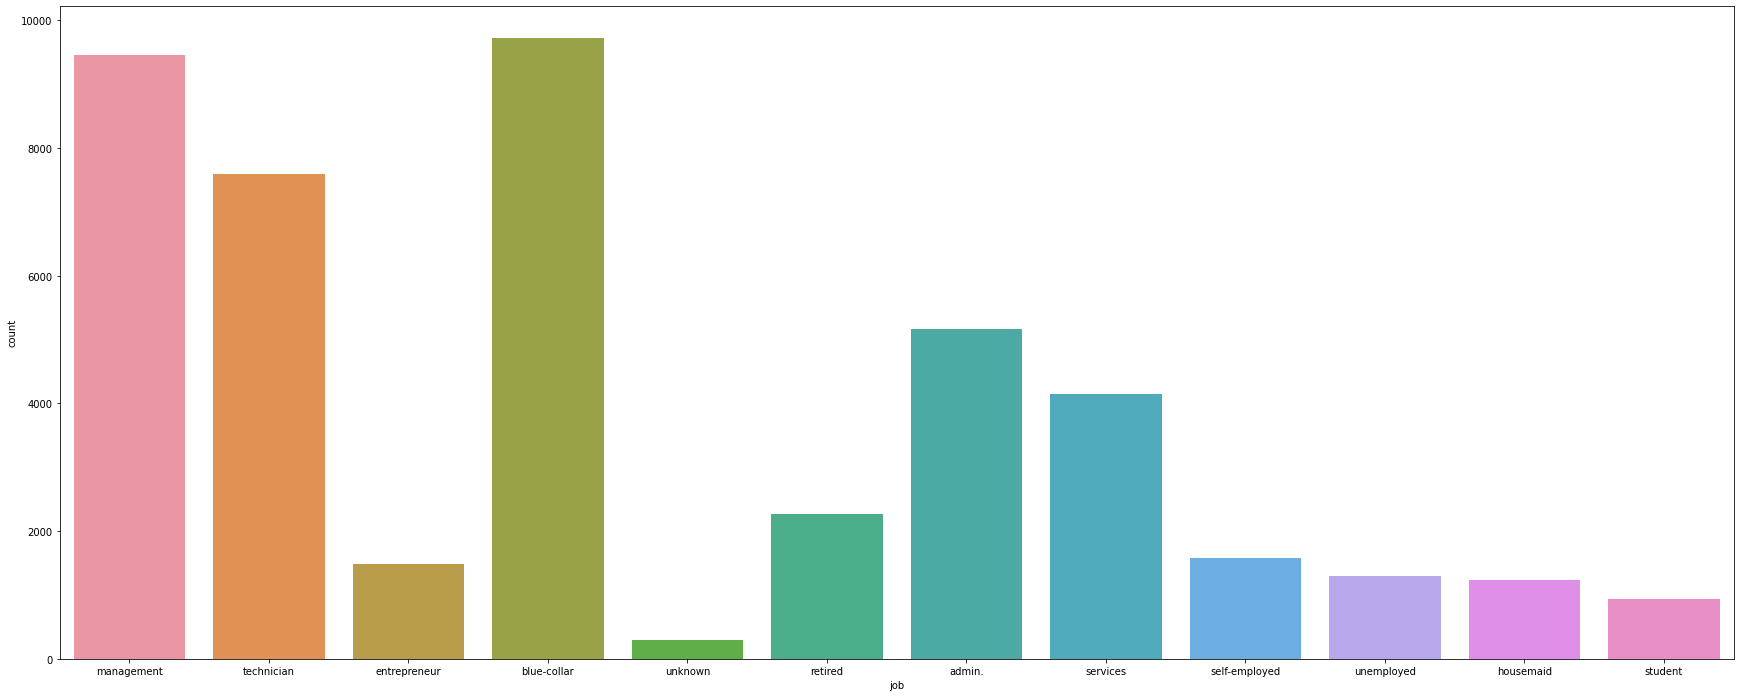

In [55]:
# Distribution of job type
plt.figure(figsize=(30,12))
sns.countplot(x=data['job'], data=data)

<AxesSubplot:xlabel='job', ylabel='count'>

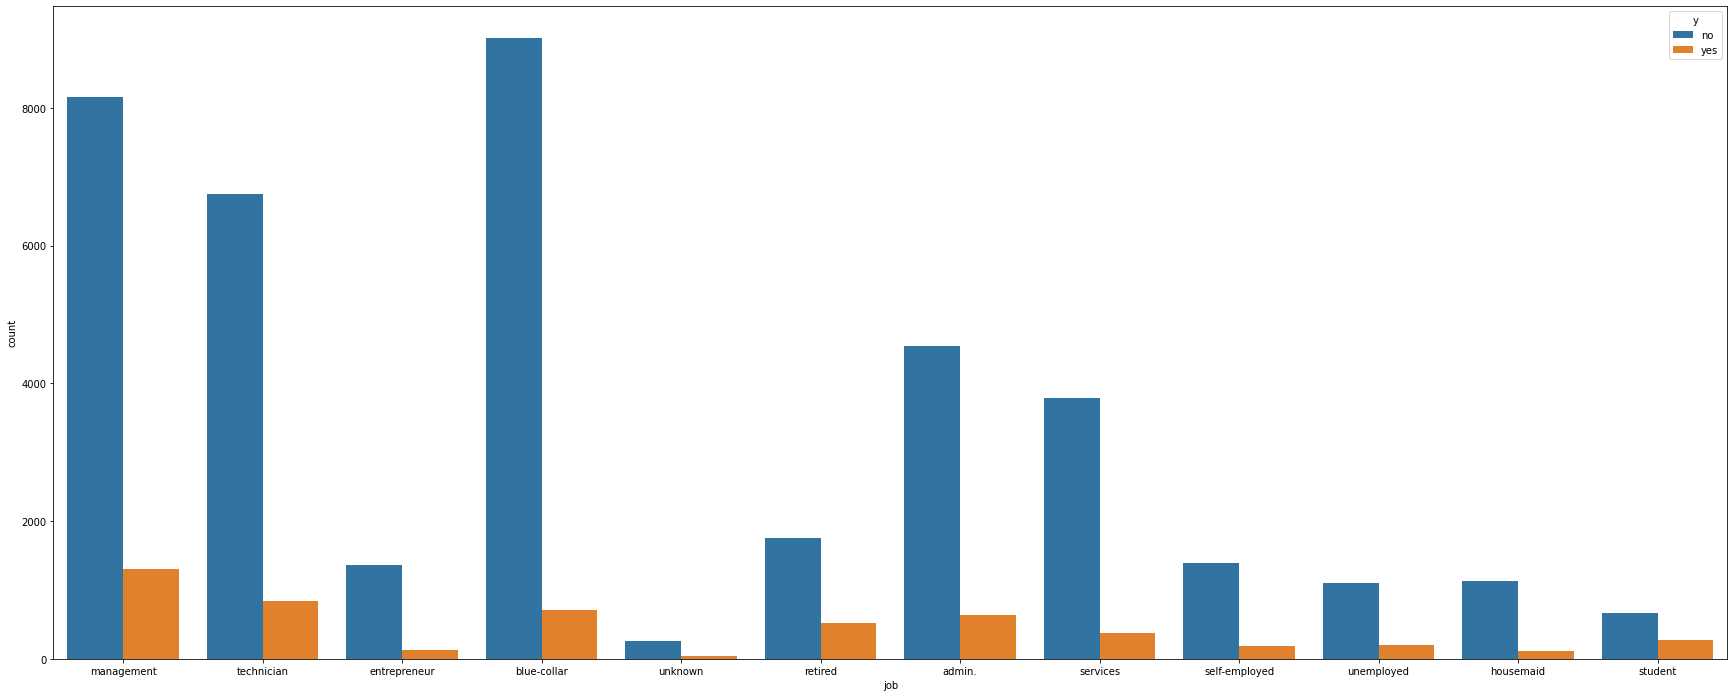

In [56]:
plt.figure(figsize=(30,12))

sns.countplot(x=data['job'], hue = data['y'],data=data)

In [57]:
data.groupby(by=['job']).count()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
job,,,,,,,,,,,,,,,,
admin.,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171
blue-collar,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732
entrepreneur,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487
housemaid,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240
management,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458
retired,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264
self-employed,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579
services,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154
student,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938


In [58]:
data.groupby(by=['job', 'y']).count()

age  marital  education  default  balance  housing  loan  \
job           y                                                                
admin.        no   4540     4540       4540     4540     4540     4540  4540   
              yes   631      631        631      631      631      631   631   
blue-collar   no   9024     9024       9024     9024     9024     9024  9024   
              yes   708      708        708      708      708      708   708   
entrepreneur  no   1364     1364       1364     1364     1364     1364  1364   
              yes   123      123        123      123      123      123   123   
housemaid     no   1131     1131       1131     1131     1131     1131  1131   
              yes   109      109        109      109      109      109   109   
management    no   8157     8157       8157     8157     8157     8157  8157   
              yes  1301     1301       1301     1301     1301     1301  1301   
retired       no   1748     1748       1748     1748     1748     1748  1748   
              yes   516      516        516      516      516      516   516   
self-employed no   1392     1392       1392     1392     1392     1392  1392   
              yes   187      187        187      187      187      187   187   
services      no   3785     3785       3785     3785     3785     3785  3785   
              yes   369      369        369      369      369      369   369   
student       no    669      669        669      669      669      669   669   
              yes   269      269        269      269      269      269   269   
technician    no   6757     6757       6757     6757     6757     6757  6757   
              yes   840      840        840      840      840      840   840   
unemployed    no   1101     1101       1101     1101     1101     1101  1101   
              yes   202      202        202      202      202      202   202   
unknown       no    254      254        254      254      254      254   254   
              yes    34       34         34       34       34       34    34   

                   contact   day  month  duration  campaign  pdays  previous  \
job           y                                                                
admin.        no      4540  4540   4540      4540      4540   4540      4540   
              yes      631   631    631       631       631    631       631   
blue-collar   no      9024  9024   9024      9024      9024   9024      9024   
              yes      708   708    708       708       708    708       708   
entrepreneur  no      1364  1364   1364      1364      1364   1364      1364   
              yes      123   123    123       123       123    123       123   
housemaid     no      1131  1131   1131      1131      1131   1131      1131   
              yes      109   109    109       109       109    109       109   
management    no      8157  8157   8157      8157      8157   8157      8157   
              yes     1301  1301   1301      1301      1301   1301      1301   
retired       no      1748  1748   1748      1748      1748   1748      1748   
              yes      516   516    516       516       516    516       516   
self-employed no      1392  1392   1392      1392      1392   1392      1392   
              yes      187   187    187       187       187    187       187   
services      no      3785  3785   3785      3785      3785   3785      3785   
              yes      369   369    369       369       369    369       369   
student       no       669   669    669       669       669    669       669   
              yes      269   269    269       269       269    269       269   
technician    no      6757  6757   6757      6757      6757   6757      6757   
              yes      840   840    840       840       840    840       840   
unemployed    no      1101  1101   1101      1101      1101   1101      1101   
              yes      202   202    202       202       202    202       202   
unknown       no   

In [59]:
print("Conversion rate for customers who are into management", 1301/9458 * 100, "percent")
print("Conversion rate for customers who are into technician jobs", 840/6897 * 100, "percent")
print("Conversion rate for customers who are into entrepreneurship", 123/1487 * 100, "percent")
print("Conversion rate for customers who are into blue collar jobs", 708/9732 * 100, "percent")
print("Conversion rate for customers who are retired", 516/2264 * 100, "percent")
print("Conversion rate for customers who are into administration", 631/5171 * 100, "percent")
print("Conversion rate for customers who are self employed", 187/1579 * 100, "percent")
print("Conversion rate for customers who are unemployed", 202/1303 * 100, "percent")
print("Conversion rate for customers who are housemaid", 109/1240 * 100, "percent")
print("Conversion rate for customers who are student", 269/938 * 100, "percent")


Conversion rate for customers who are into management 13.755550856417848 percent
Conversion rate for customers who are into technician jobs 12.179208351457154 percent
Conversion rate for customers who are into entrepreneurship 8.271687962340282 percent
Conversion rate for customers who are into blue collar jobs 7.274969173859433 percent
Conversion rate for customers who are retired 22.791519434628977 percent
Conversion rate for customers who are into administration 12.202668729452718 percent
Conversion rate for customers who are self employed 11.842938568714375 percent
Conversion rate for customers who are unemployed 15.502686108979278 percent
Conversion rate for customers who are housemaid 8.790322580645162 percent
Conversion rate for customers who are student 28.678038379530918 percent


### Inference: It is clearly seen that students have the best conversion rate of 28%

# Preprocessing the data

In [60]:
nominal_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [61]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

### User Defined Outlier Detection Algorithm

In [62]:
def removeOutliers(column_name, data):
    Q1 = np.percentile(data[column_name], 25, interpolation = 'midpoint')
    Q3 = np.percentile(data[column_name], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    removed_outliers = data[(data[column_name] <= upper) & (data[column_name] >= lower)]
    return removed_outliers


In [63]:
data['index'] = data.index
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,index
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,3
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,45206
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,45207
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,45208
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,45209


In [64]:
# Generating dummies for categorical variables
data_nominal = pd.get_dummies(data[nominal_columns], columns = nominal_columns)
data_nominal.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [65]:
data_nominal['index'] = data['index']

In [66]:
labels = pd.DataFrame(data['y'])
labels['index'] = data['index']

In [67]:
labels

,y,index
0,no,0
1,no,1
2,no,2
3,no,3
4,no,4
...,...,...
45206,yes,45206
45207,yes,45207
45208,yes,45208
45209,no,45209


In [68]:
data_nominal

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,index
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,3
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,45206
45207,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,45207
45208,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,45208
45209,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,45209


In [69]:
data_numerical = data[numerical_columns]

In [70]:
data_numerical

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [71]:
data_numerical_age = removeOutliers('age', data_numerical)
data_numerical_age['index'] = data_numerical_age.index
data_numerical_age

,age,balance,day,duration,campaign,pdays,previous,index
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,1
2,33,2,5,76,1,-1,0,2
3,47,1506,5,92,1,-1,0,3
4,33,1,5,198,1,-1,0,4
...,...,...,...,...,...,...,...,...
45203,23,113,17,266,1,-1,0,45203
45205,25,505,17,386,2,-1,0,45205
45206,51,825,17,977,3,-1,0,45206
45209,57,668,17,508,4,-1,0,45209


In [72]:
data_numerical_balance = removeOutliers('balance', data_numerical)
data_numerical_balance['index'] = data_numerical_balance.index
data_numerical_balance

,age,balance,day,duration,campaign,pdays,previous,index
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,1
2,33,2,5,76,1,-1,0,2
3,47,1506,5,92,1,-1,0,3
4,33,1,5,198,1,-1,0,4
...,...,...,...,...,...,...,...,...
45205,25,505,17,386,2,-1,0,45205
45206,51,825,17,977,3,-1,0,45206
45207,71,1729,17,456,2,-1,0,45207
45209,57,668,17,508,4,-1,0,45209


In [73]:
data_numerical_day = removeOutliers('day', data_numerical)
data_numerical_day['index'] = data_numerical_day.index
data_numerical_day

,age,balance,day,duration,campaign,pdays,previous,index
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,1
2,33,2,5,76,1,-1,0,2
3,47,1506,5,92,1,-1,0,3
4,33,1,5,198,1,-1,0,4
...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,45206
45207,71,1729,17,456,2,-1,0,45207
45208,72,5715,17,1127,5,184,3,45208
45209,57,668,17,508,4,-1,0,45209


In [74]:
data_numerical_duration = removeOutliers('duration', data_numerical)
data_numerical_duration['index'] = data_numerical_duration.index
data_numerical_duration

,age,balance,day,duration,campaign,pdays,previous,index
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,1
2,33,2,5,76,1,-1,0,2
3,47,1506,5,92,1,-1,0,3
4,33,1,5,198,1,-1,0,4
...,...,...,...,...,...,...,...,...
45204,73,2850,17,300,1,40,8,45204
45205,25,505,17,386,2,-1,0,45205
45207,71,1729,17,456,2,-1,0,45207
45209,57,668,17,508,4,-1,0,45209


In [75]:
data_numerical_campaign = removeOutliers('campaign', data_numerical)
data_numerical_campaign['index'] = data_numerical_campaign.index
data_numerical_campaign

,age,balance,day,duration,campaign,pdays,previous,index
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,1
2,33,2,5,76,1,-1,0,2
3,47,1506,5,92,1,-1,0,3
4,33,1,5,198,1,-1,0,4
...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,45206
45207,71,1729,17,456,2,-1,0,45207
45208,72,5715,17,1127,5,184,3,45208
45209,57,668,17,508,4,-1,0,45209


In [76]:
data_numerical_pdays = removeOutliers('pdays', data_numerical)
data_numerical_pdays['index'] = data_numerical_pdays.index
data_numerical_pdays

,age,balance,day,duration,campaign,pdays,previous,index
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,1
2,33,2,5,76,1,-1,0,2
3,47,1506,5,92,1,-1,0,3
4,33,1,5,198,1,-1,0,4
...,...,...,...,...,...,...,...,...
45203,23,113,17,266,1,-1,0,45203
45205,25,505,17,386,2,-1,0,45205
45206,51,825,17,977,3,-1,0,45206
45207,71,1729,17,456,2,-1,0,45207


In [77]:
data_numerical_previous = removeOutliers('previous', data_numerical)
data_numerical_previous['index'] = data_numerical_previous.index
data_numerical_previous

,age,balance,day,duration,campaign,pdays,previous,index
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,1
2,33,2,5,76,1,-1,0,2
3,47,1506,5,92,1,-1,0,3
4,33,1,5,198,1,-1,0,4
...,...,...,...,...,...,...,...,...
45203,23,113,17,266,1,-1,0,45203
45205,25,505,17,386,2,-1,0,45205
45206,51,825,17,977,3,-1,0,45206
45207,71,1729,17,456,2,-1,0,45207


In [78]:
data_numerical_previous.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'index'],
      dtype='object')

In [79]:
dfs = [data_numerical_previous, data_numerical_pdays, data_numerical_campaign, data_numerical_duration, 
      data_numerical_day, data_numerical_balance, data_numerical_age]

In [80]:
import functools as ft
df_numerical_final = ft.reduce(lambda left, right: pd.merge(left, right, on=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'index'], how="inner"), dfs)

In [81]:
df_numerical_final

,age,balance,day,duration,campaign,pdays,previous,index
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,1
2,33,2,5,76,1,-1,0,2
3,47,1506,5,92,1,-1,0,3
4,33,1,5,198,1,-1,0,4
...,...,...,...,...,...,...,...,...
28188,37,1428,16,333,2,-1,0,45198
28189,34,557,17,224,1,-1,0,45202
28190,23,113,17,266,1,-1,0,45203
28191,25,505,17,386,2,-1,0,45205


## Checking the variables post outlier treatment

<AxesSubplot:xlabel='duration', ylabel='Count'>

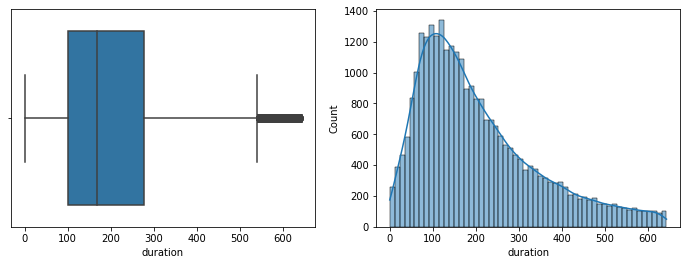

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='duration', data=df_numerical_final, ax=axes[0])
sns.histplot(x='duration', data=df_numerical_final, kde=True, ax=axes[1])

<AxesSubplot:xlabel='pdays', ylabel='Count'>

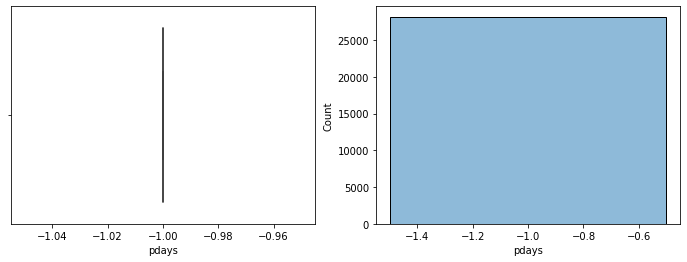

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='pdays', data=df_numerical_final, ax=axes[0])
sns.histplot(x='pdays', data=df_numerical_final, kde=True, ax=axes[1])

<AxesSubplot:xlabel='campaign', ylabel='Count'>

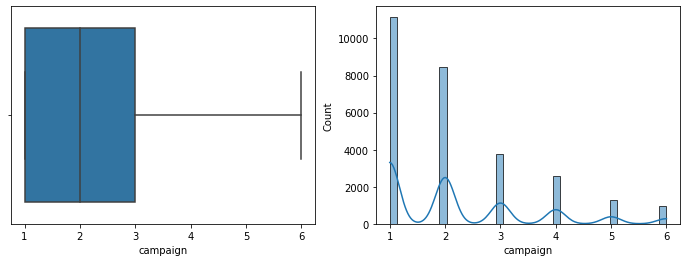

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='campaign', data=df_numerical_final, ax=axes[0])
sns.histplot(x='campaign', data=df_numerical_final, kde=True, ax=axes[1])

<AxesSubplot:xlabel='previous', ylabel='Count'>

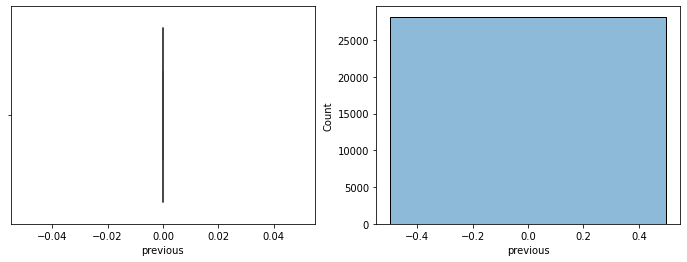

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='previous', data=df_numerical_final, ax=axes[0])
sns.histplot(x='previous', data=df_numerical_final, kde=True, ax=axes[1])


<AxesSubplot:xlabel='day', ylabel='Count'>

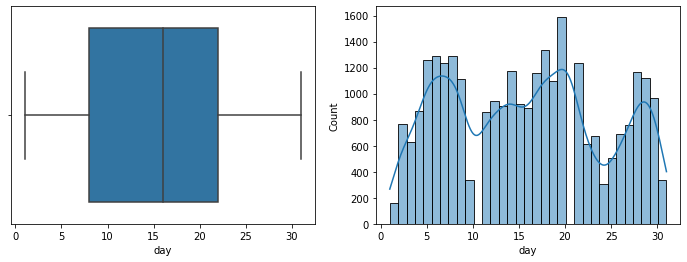

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='day', data=df_numerical_final, ax=axes[0])
sns.histplot(x='day', data=df_numerical_final, kde=True, ax=axes[1])


<AxesSubplot:xlabel='balance', ylabel='Count'>

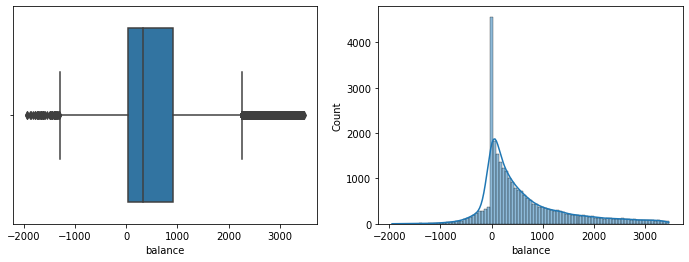

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='balance', data=df_numerical_final, ax=axes[0])
sns.histplot(x='balance', data=df_numerical_final, kde=True, ax=axes[1])

<AxesSubplot:xlabel='age', ylabel='Count'>

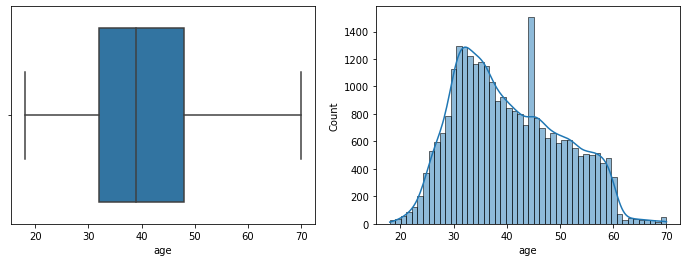

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='age', data=df_numerical_final, ax=axes[0])
sns.histplot(x='age', data=df_numerical_final, kde=True, ax=axes[1])

In [89]:
df_numerical_final_norm = df_numerical_final.loc[:, df_numerical_final.columns != 'index']

In [90]:
df_numerical_final

,age,balance,day,duration,campaign,pdays,previous,index
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,1
2,33,2,5,76,1,-1,0,2
3,47,1506,5,92,1,-1,0,3
4,33,1,5,198,1,-1,0,4
...,...,...,...,...,...,...,...,...
28188,37,1428,16,333,2,-1,0,45198
28189,34,557,17,224,1,-1,0,45202
28190,23,113,17,266,1,-1,0,45203
28191,25,505,17,386,2,-1,0,45205


In [91]:
df_numerical_final_norm

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
28188,37,1428,16,333,2,-1,0
28189,34,557,17,224,1,-1,0
28190,23,113,17,266,1,-1,0
28191,25,505,17,386,2,-1,0


In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_numerical_final_normalized = scaler.fit_transform(df_numerical_final_norm)

In [93]:
df_numerical_final_normalized = pd.DataFrame(df_numerical_final_normalized)

In [94]:
df_numerical_final_normalized

,0,1,2,3,4,5,6
0,0.769231,0.756012,0.133333,0.405910,0.0,0.0,0.0
1,0.500000,0.364965,0.133333,0.234837,0.0,0.0,0.0
2,0.288462,0.359970,0.133333,0.118196,0.0,0.0,0.0
3,0.557692,0.638180,0.133333,0.143079,0.0,0.0,0.0
4,0.288462,0.359785,0.133333,0.307932,0.0,0.0,0.0
...,...,...,...,...,...,...,...
28188,0.365385,0.623751,0.500000,0.517885,0.2,0.0,0.0
28189,0.307692,0.462634,0.533333,0.348367,0.0,0.0,0.0
28190,0.096154,0.380503,0.533333,0.413686,0.0,0.0,0.0
28191,0.134615,0.453015,0.533333,0.600311,0.2,0.0,0.0


In [95]:
rename_column_dict = {0: 'age', 1: 'balance', 2: 'day', 3: 'duration', 4: 'campaign', 5: 'pdays', 6: 'previous'}

In [96]:
df_numerical_final_normalized = df_numerical_final_normalized.rename(
    columns=rename_column_dict)

In [97]:
df_numerical_final_normalized

,age,balance,day,duration,campaign,pdays,previous
0,0.769231,0.756012,0.133333,0.405910,0.0,0.0,0.0
1,0.500000,0.364965,0.133333,0.234837,0.0,0.0,0.0
2,0.288462,0.359970,0.133333,0.118196,0.0,0.0,0.0
3,0.557692,0.638180,0.133333,0.143079,0.0,0.0,0.0
4,0.288462,0.359785,0.133333,0.307932,0.0,0.0,0.0
...,...,...,...,...,...,...,...
28188,0.365385,0.623751,0.500000,0.517885,0.2,0.0,0.0
28189,0.307692,0.462634,0.533333,0.348367,0.0,0.0,0.0
28190,0.096154,0.380503,0.533333,0.413686,0.0,0.0,0.0
28191,0.134615,0.453015,0.533333,0.600311,0.2,0.0,0.0


In [98]:
df_numerical_final_normalized['index'] = df_numerical_final['index']

In [99]:
df_numerical_final_normalized

,age,balance,day,duration,campaign,pdays,previous,index
0,0.769231,0.756012,0.133333,0.405910,0.0,0.0,0.0,0
1,0.500000,0.364965,0.133333,0.234837,0.0,0.0,0.0,1
2,0.288462,0.359970,0.133333,0.118196,0.0,0.0,0.0,2
3,0.557692,0.638180,0.133333,0.143079,0.0,0.0,0.0,3
4,0.288462,0.359785,0.133333,0.307932,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...
28188,0.365385,0.623751,0.500000,0.517885,0.2,0.0,0.0,45198
28189,0.307692,0.462634,0.533333,0.348367,0.0,0.0,0.0,45202
28190,0.096154,0.380503,0.533333,0.413686,0.0,0.0,0.0,45203
28191,0.134615,0.453015,0.533333,0.600311,0.2,0.0,0.0,45205


In [100]:
final_data = pd.merge(df_numerical_final_normalized, data_nominal, on="index", how="inner")

In [101]:
final_data = pd.merge(labels, final_data, how="inner", on = "index")

In [102]:
del final_data['index']

In [103]:
final_data

,y,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,no,0.769231,0.756012,0.133333,0.405910,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,no,0.500000,0.364965,0.133333,0.234837,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,no,0.288462,0.359970,0.133333,0.118196,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,no,0.557692,0.638180,0.133333,0.143079,0.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,no,0.288462,0.359785,0.133333,0.307932,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28188,no,0.365385,0.623751,0.500000,0.517885,0.2,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
28189,yes,0.307692,0.462634,0.533333,0.348367,0.0,0.0,0.0,1,0,...,0,0,0,1,0,0,0,0,0,1
28190,yes,0.096154,0.380503,0.533333,0.413686,0.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
28191,yes,0.134615,0.453015,0.533333,0.600311,0.2,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1


# Splitting into training and testing set

In [104]:
labels = final_data['y']

<AxesSubplot:xlabel='y', ylabel='count'>

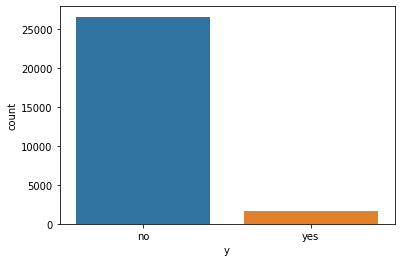

In [105]:
sns.countplot(labels)

### We see a high imbalance in class

In [106]:
label_encoder = preprocessing.LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [107]:
features = final_data.loc[:, final_data.columns != 'y']

In [108]:
features.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [109]:
X_Train, X_Test, y_Train, y_Test = train_test_split(features, labels, test_size=0.20, random_state=42)

# Selecting the model and training

In [110]:
roc_auc_scores = {}

In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [112]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [113]:
labels = pd.DataFrame(labels)

In [114]:
from sklearn.model_selection import KFold 
k = 5
kf = KFold(n_splits=k, random_state=None)

In [115]:
from sklearn.neighbors import KNeighborsClassifier
k_value_range = 10
validation_score = []
train_score = []
for k in range(1, k_value_range+1):
    print("Result for K value", k)
    acc_score = []
    trn_score = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for train_index , test_index in kf.split(features):
        X_train, X_test = features.iloc[train_index,:],features.iloc[test_index,:]
        y_train, y_test = labels.iloc[train_index] , labels.iloc[test_index]
     
        knn.fit(X_train,y_train)
        trn_score.append(knn.score(X_train,y_train))
        pred_values = knn.predict(X_test)
     
        acc = f1_score(pred_values , y_test)
        acc_score.append(acc)
     
    avg_acc_score = sum(acc_score)/len(acc_score)
    avg_train_score = sum(trn_score)/len(trn_score)
    validation_score.append(avg_acc_score)
    train_score.append(avg_train_score)
 
    print('F1 score of each fold - {}'.format(acc_score))
    print('Avg validation F1 Score : {}'.format(avg_acc_score))
    print('Avg train F1 Score accuracy : {}'.format(avg_train_score))

Result for K value 1
F1 score of each fold - [0.05194805194805195, 0.045454545454545456, 0.09681881051175657, 0.1574539363484087, 0.20187793427230047]
Avg validation F1 Score : 0.11071065570701263
Avg train F1 Score accuracy : 1.0
Result for K value 2
F1 score of each fold - [0.0, 0.045454545454545456, 0.09216589861751152, 0.1436893203883495, 0.03259827420901247]
Avg validation F1 Score : 0.06278160773388378
Avg train F1 Score accuracy : 0.9589346613473608
Result for K value 3
F1 score of each fold - [0.0, 0.05076142131979696, 0.08875739644970415, 0.16389244558258642, 0.07636363636363636]
Avg validation F1 Score : 0.07595497994314479
Avg train F1 Score accuracy : 0.9605485468831306
Result for K value 4
F1 score of each fold - [0.0, 0.03603603603603603, 0.09326424870466321, 0.1660377358490566, 0.015533980582524271]
Avg validation F1 Score : 0.062174400234456015
Avg train F1 Score accuracy : 0.9521421544769314
Result for K value 5
F1 score of each fold - [0.0, 0.0625, 0.10344827586206898

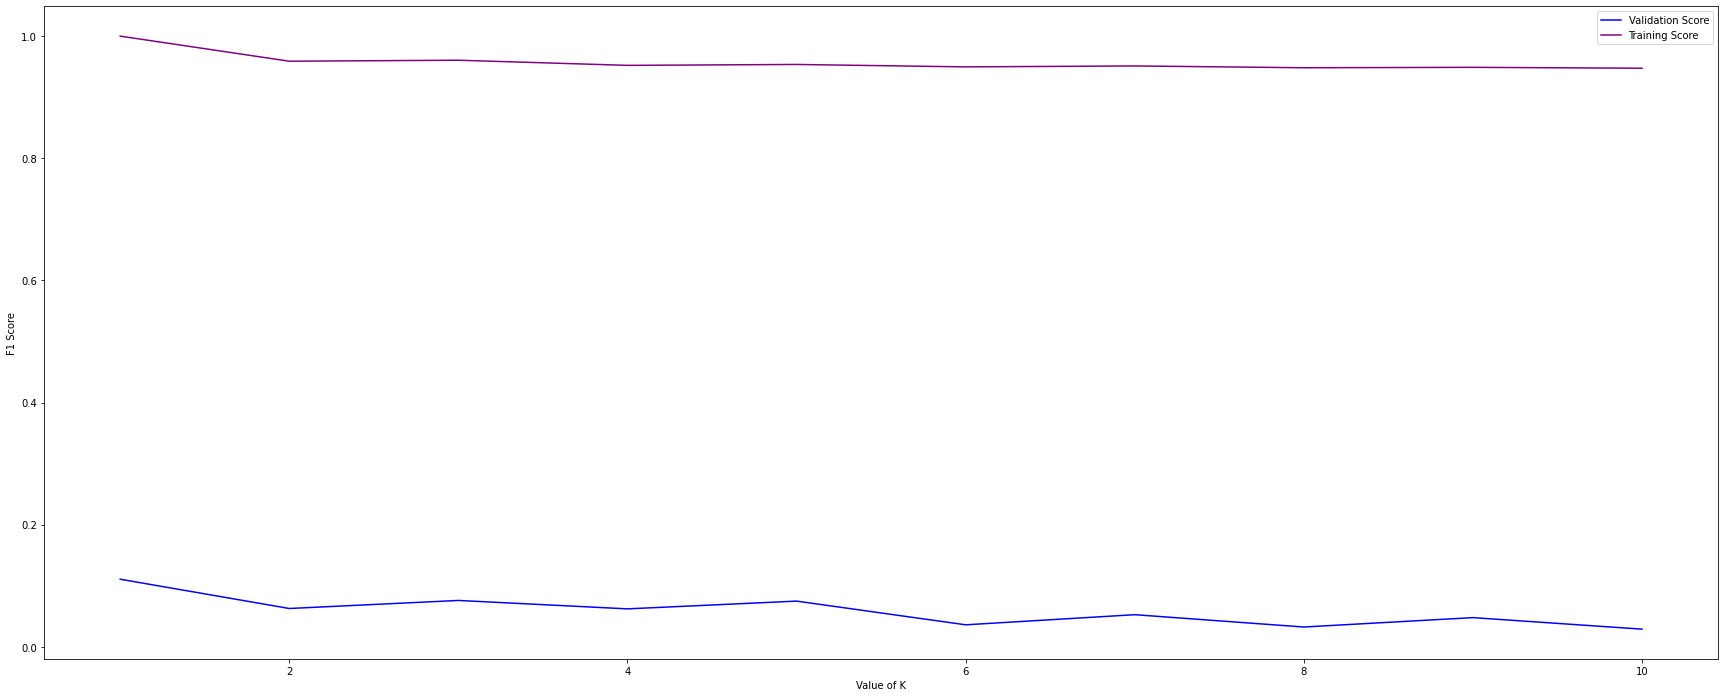

In [116]:
plt.figure(figsize=(30,12))
plt.plot(np.arange(1,11), validation_score, color="blue", label="Validation Score")
plt.plot(np.arange(1,11), train_score, color="purple", label="Training Score")
plt.xlabel("Value of K")
plt.ylabel("F1 Score")
plt.legend()

### Inference: A K Value of 1 is giving the best result, Post that we don't see any improvements as such 

In [117]:
def Confusion_Matrix(x,y):
    cm = confusion_matrix(x,y)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    total = TN+FN+TP+FP
    
    print(cm)
    print('correctly specified percentage : ',(TN+TP)/total*100)
    print('Incorrectly specified percentage : ',(FN+FP)/total*100)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    print("Positive Prediction rate(Precision) : ",precision)  # Positive prediction Rate
    print("Negative Prediction Rate : ",TN/(TN+FN))             # Negative Prediction Rate
    print("Sensitivity(Recall) :", recall) # Actually How much actual positive model predicted out of total actual positive
    print("Specificity :", TN/(FP+TN))     # Actually How much actual negative model predicted out of total actual negative
    print("F-1 Score :", 2 * (precision * recall) / (precision + recall))

In [118]:
k_value = 1
knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(X_Train, y_Train)
y_pred = knn.predict(X_Test)
Confusion_Matrix(y_Test, y_pred)

[[5157  174]
 [ 230   78]]
correctly specified percentage :  92.83560915055861
Incorrectly specified percentage :  7.16439084944139
Positive Prediction rate(Precision) :  0.30952380952380953
Negative Prediction Rate :  0.9573046222387228
Sensitivity(Recall) : 0.2532467532467532
Specificity : 0.9673607203151379
F-1 Score : 0.2785714285714285


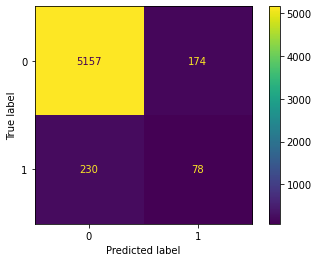

In [119]:
plot_confusion_matrix(knn, X_Test, y_Test)

0.6103037367809455


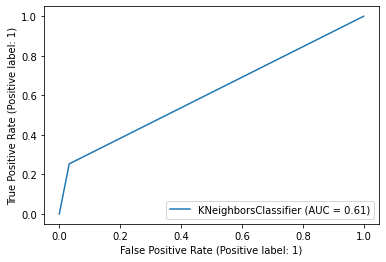

In [120]:
plot_roc_curve(knn, X_Test, y_Test)
auc = roc_auc_score(y_Test, knn.predict_proba(X_Test)[:, 1])
fpr, tpr, _ = roc_curve(y_Test, knn.predict_proba(X_Test)[:, 1])
print(auc)

In [121]:
roc_auc_scores['KNN'] = [fpr, tpr, auc]

In [122]:
# Decision Tree Classifier
accuracy = []
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
acc_score = []
trn_score = []
for train_index , test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index,:],features.iloc[test_index,:]
    y_train, y_test = labels.iloc[train_index] , labels.iloc[test_index]
     
    dec_tree.fit(X_train,y_train)
    trn_score.append(dec_tree.score(X_train,y_train))
    pred_values = dec_tree.predict(X_test)
     
    acc = f1_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/len(acc_score)
avg_trn_score = sum(trn_score)/len(trn_score)
 
print('F1 score of each fold - {}'.format(acc_score))
print('Avg validation F1 Score : {}'.format(avg_acc_score))
print('Avg train F1 Score accuracy : {}'.format(avg_train_score))

F1 score of each fold - [0.059574468085106386, 0.08787128712871288, 0.10869565217391305, 0.16313213703099508, 0.2981366459627329]
Avg validation F1 Score : 0.14348203807629206
Avg train F1 Score accuracy : 0.9474423835072974


Text(0.5, 1.0, 'Validation Accuracy Across Folds')

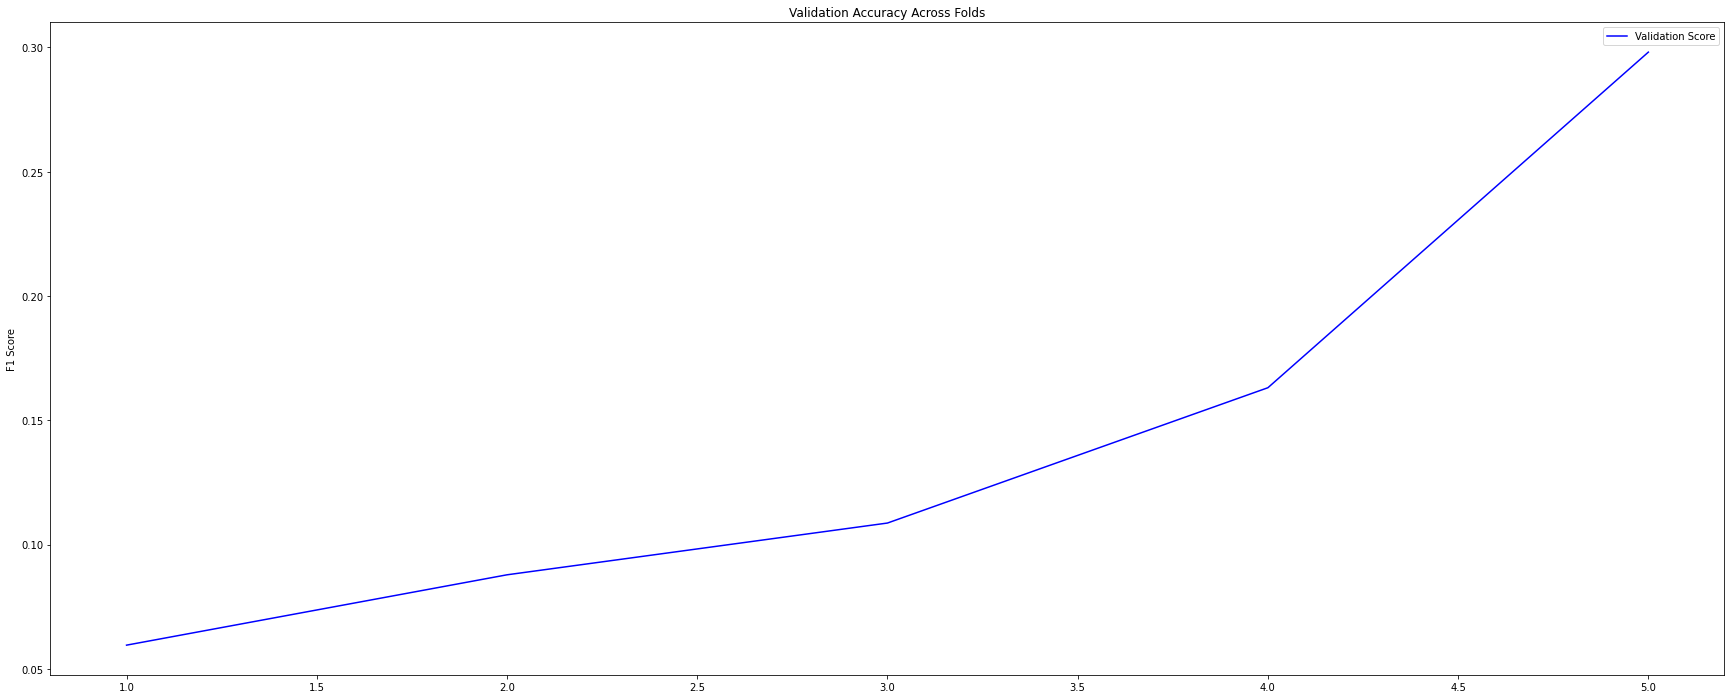

In [123]:
plt.figure(figsize=(30,12))
plt.plot(np.arange(1,6), acc_score, color="blue", label="Validation Score")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Validation Accuracy Across Folds")

In [124]:
dec_tree_predictions = dec_tree.predict(X_Test)
Confusion_Matrix(y_Test, dec_tree_predictions)

[[5283   48]
 [ 150  158]]
correctly specified percentage :  96.48873913814506
Incorrectly specified percentage :  3.511260861854939
Positive Prediction rate(Precision) :  0.7669902912621359
Negative Prediction Rate :  0.9723909442297074
Sensitivity(Recall) : 0.512987012987013
Specificity : 0.9909960607765897
F-1 Score : 0.6147859922178989


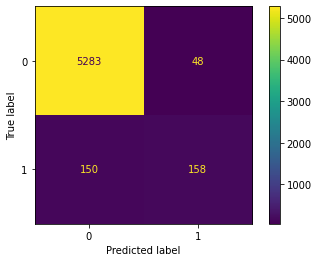

In [125]:
plot_confusion_matrix(dec_tree, X_Test, y_Test)

0.7519915368818014


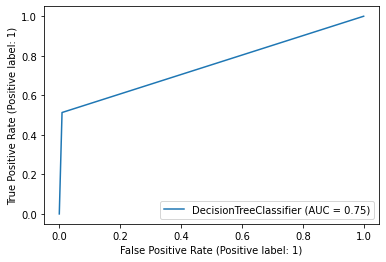

In [126]:
plot_roc_curve(dec_tree, X_Test, y_Test)
auc = roc_auc_score(y_Test, dec_tree.predict_proba(X_Test)[:, 1])
fpr, tpr, _ = roc_curve(y_Test, dec_tree.predict_proba(X_Test)[:, 1])
print(auc)

In [127]:
roc_auc_scores['DecisionTree'] = [fpr, tpr, auc]

In [128]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
acc_score = []
trn_score = []
for train_index , test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index,:],features.iloc[test_index,:]
    y_train, y_test = labels.iloc[train_index] , labels.iloc[test_index]
     
    log_reg.fit(X_train,y_train)
    trn_score.append(log_reg.score(X_train, y_train))
    pred_values = log_reg.predict(X_test)
     
    acc = f1_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/len(acc_score)
 
print('F1 Score of each fold - {}'.format(acc_score))
print('Avg F1 Score : {}'.format(avg_acc_score))
log_reg_predictions = log_reg.predict(X_test)

F1 Score of each fold - [0.0, 0.14906832298136646, 0.1568627450980392, 0.24784853700516354, 0.1807909604519774]
Avg F1 Score : 0.14691411310730934


Text(0.5, 1.0, 'Validation F1 Score Across Folds')

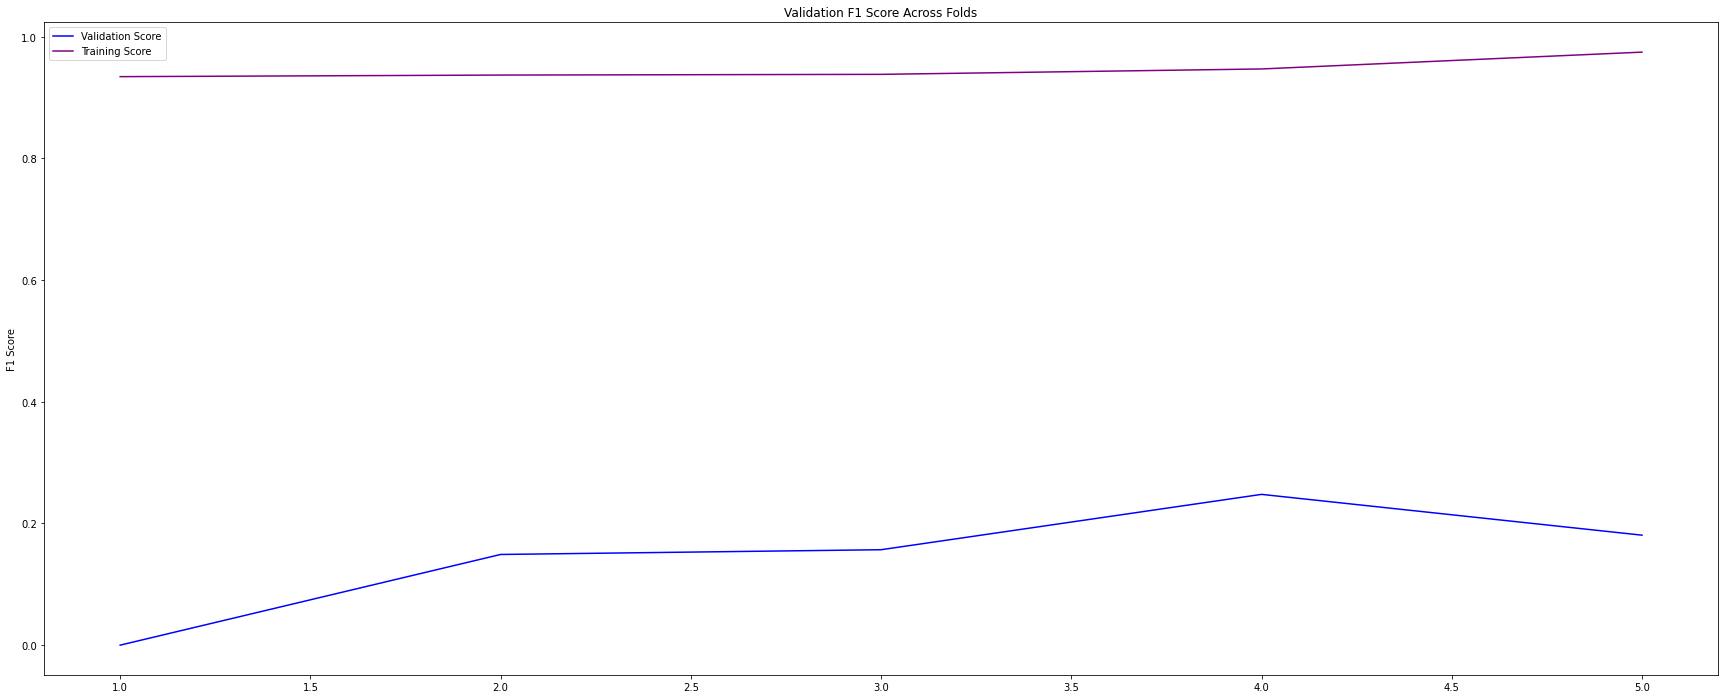

In [129]:
plt.figure(figsize=(30,12))
plt.plot(np.arange(1,6), acc_score, color="blue", label="Validation Score")
plt.plot(np.arange(1,6), trn_score, color="purple", label="Training Score")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Validation F1 Score Across Folds")

In [130]:
log_reg_predictions = log_reg.predict(X_Test)
Confusion_Matrix(y_Test, log_reg_predictions)

[[5298   33]
 [ 270   38]]
correctly specified percentage :  94.62670686291895
Incorrectly specified percentage :  5.373293137081043
Positive Prediction rate(Precision) :  0.5352112676056338
Negative Prediction Rate :  0.9515086206896551
Sensitivity(Recall) : 0.12337662337662338
Specificity : 0.9938097917839055
F-1 Score : 0.20052770448548815


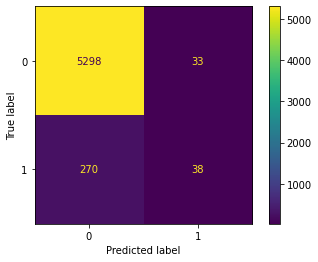

In [131]:
plot_confusion_matrix(log_reg, X_Test, y_Test.reshape(-1,1))

0.8172037116887988


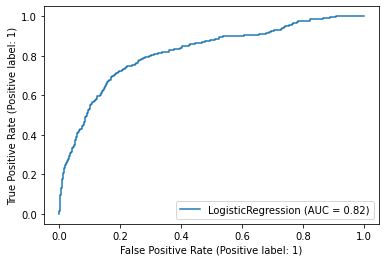

In [132]:
plot_roc_curve(log_reg, X_Test, y_Test)
auc = roc_auc_score(y_Test, log_reg.predict_proba(X_Test)[:, 1])
fpr, tpr, _ = roc_curve(y_Test, log_reg.predict_proba(X_Test)[:, 1])
print(auc)

In [133]:
roc_auc_scores['Logistic Regression'] = [fpr, tpr, auc]

In [134]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
random_for = RandomForestClassifier()
acc_score = []
trn_score = []
for train_index , test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index,:],features.iloc[test_index,:]
    y_train, y_test = labels.iloc[train_index] , labels.iloc[test_index]
     
    random_for.fit(X_train,y_train)
    trn_score.append(random_for.score(X_train, y_train))
    pred_values = random_for.predict(X_test)
     
    acc = f1_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/len(acc_score)
 
print('F1 Score of each fold - {}'.format(acc_score))
print('Avg F1 Score : {}'.format(avg_acc_score))
random_for_predictions = random_for.predict(X_test)

F1 Score of each fold - [0.0, 0.047058823529411764, 0.1171171171171171, 0.20906801007556675, 0.07373271889400922]
Avg F1 Score : 0.08939533392322097


Text(0.5, 1.0, 'Validation F1 Score Across Folds')

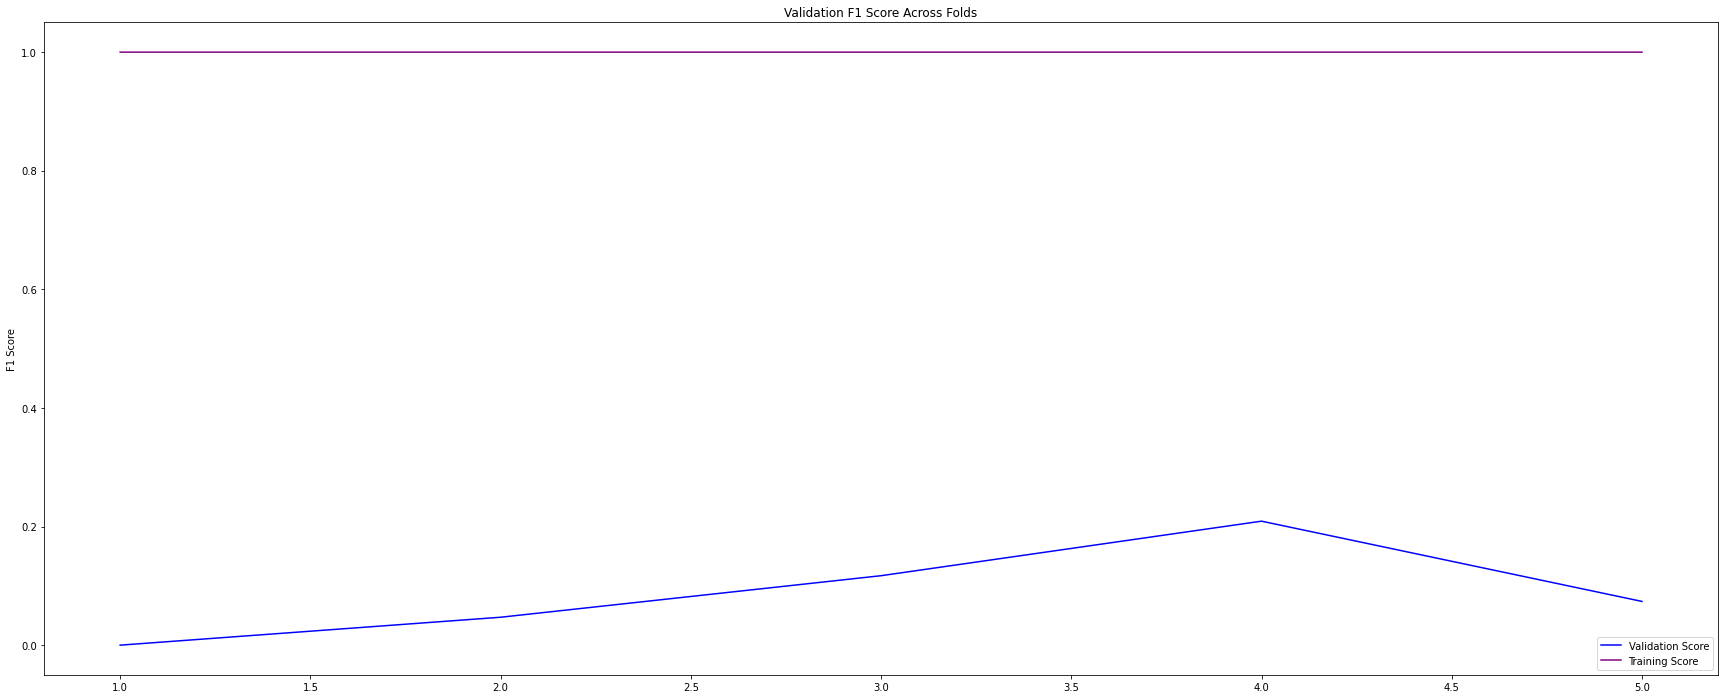

In [135]:
plt.figure(figsize=(30,12))
plt.plot(np.arange(1,6), acc_score, color="blue", label="Validation Score")
plt.plot(np.arange(1,6), trn_score, color="purple", label="Training Score")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Validation F1 Score Across Folds")

In [136]:
random_for_predictions = random_for.predict(X_Test)
Confusion_Matrix(y_Test, random_for_predictions)

[[5324    7]
 [ 191  117]]
correctly specified percentage :  96.48873913814506
Incorrectly specified percentage :  3.511260861854939
Positive Prediction rate(Precision) :  0.9435483870967742
Negative Prediction Rate :  0.9653671804170444
Sensitivity(Recall) : 0.37987012987012986
Specificity : 0.9986869255299193
F-1 Score : 0.5416666666666666


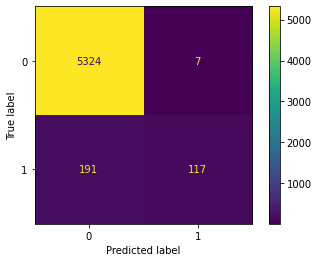

In [137]:
plot_confusion_matrix(random_for, X_Test, y_Test.reshape(-1,1))

0.9495075361704512


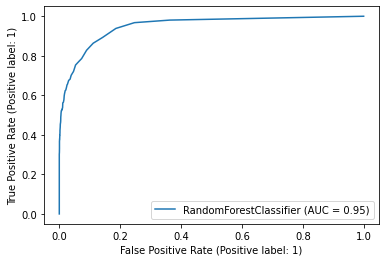

In [138]:
plot_roc_curve(random_for, X_Test, y_Test)
auc = roc_auc_score(y_Test, random_for.predict_proba(X_Test)[:, 1])
fpr, tpr, _ = roc_curve(y_Test, random_for.predict_proba(X_Test)[:, 1])
print(auc)

In [139]:
roc_auc_scores['Random Forest Classifier'] = [fpr, tpr, auc]

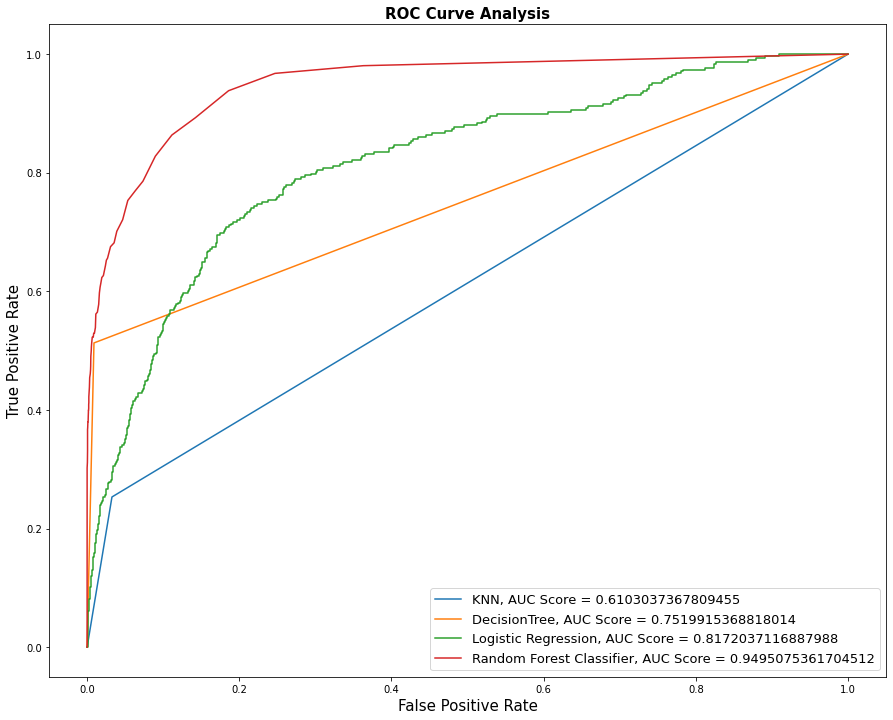

In [140]:
fig = plt.figure(figsize=(15,12))
for classifier, values in roc_auc_scores.items():
    plt.plot(values[0], values[1], label=classifier + ", AUC Score = " + str(values[2]))
plt.legend(prop={'size':13}, loc='lower right')
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.xlabel("False Positive Rate", fontsize=15)
plt.show()

## Conclusion: Random Forest Classifier has the highest AUC Score of 94%